In [2]:
#Importing the common EDA libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set()

Exploratory data analysis, as the term suggests entails exploring data wherein summary statistics of the data are obtained.
As per the problem statement of Rossman Store Sales,"Rossmann store managers are tasked with predicting their daily sales  for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and 
state holidays, seasonality, and locality."
For the purpose of EDA, we'll look at two files: train.csv and store.csv
First let's look at train.csv

In [3]:
train=pd.read_csv('train.csv')       #importing the file
print(train.head())                  #first five rows of the data 

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


C:\Users\Siddharth\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


After having a first look at the data, one would proceed to form a hypothsis about it, which may not necessarily be correct 
These are tested for correctness during the course of the EDA exercise.
For this particular data, following hypothesis is formed:
    1. Sales would be weak on the weekends when the stores are mostly closed.
    2. Sales and Customers would be linearly related. More Customers, more sales.
    3. More sales on days on which promo is available.
    4. More sales expected on the days on which there is state/school holiday, but the store is open.

In [4]:
# Let's now look at store.csv and update our hypothesis based on observations in the data in this file
store=pd.read_csv('store.csv',parse_dates=True,index_col=0)
print(store.head())

      StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
Store                                                                        
1             c          a               1270.0                        9.0   
2             a          a                570.0                       11.0   
3             a          a              14130.0                       12.0   
4             c          c                620.0                        9.0   
5             a          a              29910.0                        4.0   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
Store                                                                       
1                        2008.0       0              NaN              NaN   
2                        2007.0       1             13.0           2010.0   
3                        2006.0       1             14.0           2011.0   
4                        2009.0       0              NaN            

Hypothesis is as follows:
    1. Sales should increase with increase in competition distance
    2. Sales before the opening of competitor should be more than that after opening.
    3. Months in which promo2 is available should see more sales
    4. Sales before promo2 became availabe should be less than that after.

Additionally, it would be interesting to analyse sales with respect to the store and assortment type.

Identification of variables is an important part of EDA. We will claasify our variables on the basis of whether they are 
exploratory(independent) or respone(dependent). Variable can further be quantitative or categorical.
In this case, clearly, 'Sales' is the respone variable and it is quantitative.
Let's check the data types of the variables and the categories into which they fit.

In [5]:
print(train.info())
print(store.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1115
Data columns (total 9 columns):
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYea

In [6]:
# Store                        : Categorical   Explanatory
# DayOfWeek                    : Categorical   Explanatory
# Date                         : Categorical   Explanatory
# Sales                        : Quantitative  Response
# Customers                    : Quantitative  Response
# Open                         : Categorical   Explanatory
# Promo                        : Categorical   Explanatory
# StateHoliday                 : Categorical   Explanatory
# SchoolHoliday                : Categorical   Explanatory

# StoreType                    : Categorical   Explanatory
# Assortment                   : Categorical   Explanatory
# CompetitionDistance          : Quantitative  Explanatory  
# CompetitionOpenSinceMonth    : Categorical   Explanatory
# CompetitionOpenSinceYear     : Categorical   Explanatory
# Promo2                       : Categorical   Explanatory
# Promo2SinceWeek              : Categorical   Explanatory
# Promo2SinceYear              : Categorical   Explanatory
# PromoInterval                : Categorical   Explanatory

Univariate Analysis: We will consider one variable at a time
For quantitative variables, we are interested in the distribution. We will make use of histograms, box plots
For categorical variables, we will make use of bar charts and pie charts to see their distribution

C:\Users\Siddharth\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Siddharth\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


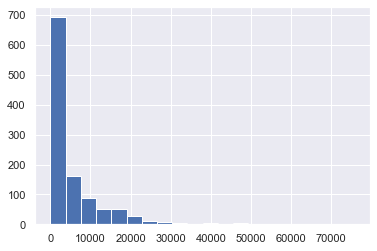

In [7]:
# Quantitative variables
# Frequency distribution of sales, customers and CompetitionDistance
plt.hist(store['CompetitionDistance'],bins=20)
plt.show()

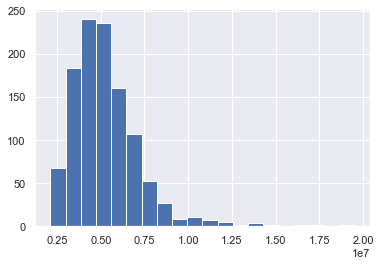

In [8]:
# Grouping sales by store to see store-wise sales distribution
sales_grouped=train.groupby(['Store'])['Sales'].sum()
plt.hist(sales_grouped,bins=20)
plt.show()

In [9]:
print(sales_grouped.describe())

count    1.115000e+03
mean     5.267427e+06
std      1.951304e+06
min      2.114322e+06
25%      3.949377e+06
50%      4.990259e+06
75%      6.084148e+06
max      1.951684e+07
Name: Sales, dtype: float64


In [10]:
train['Date']=pd.to_datetime(train['Date'])
train['month']=train['Date'].dt.strftime('%b')
train['weekday']=train['Date'].dt.strftime('%a')
print(train.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'month', 'weekday'],
      dtype='object')


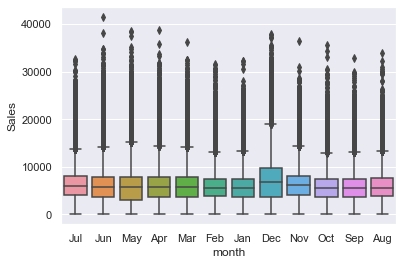

In [11]:
# Bivariate Analysis: We'll now consider two variables at a time
#C --> Q
sns.boxplot(x=train['month'],y=train['Sales'])

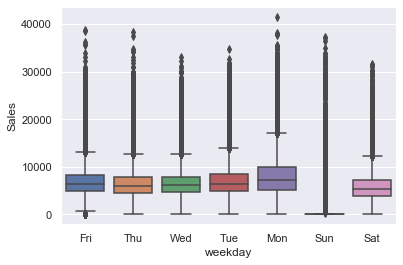

In [12]:
# December appears to have the highest median sales but there is larger variation. Also January median and IQR are significantly
# lower than those of December
sns.boxplot(x=train['weekday'],y=train['Sales'])

There are virtually no sales on Sunday, whereas sales values on Saturday are significantly lower than other days.
Also Monday has highest median sales, but larger IQR too.

In [13]:
#merging the two dataframes to make consolidated data
consolidated=pd.merge(train,store,how='left',on='Store')

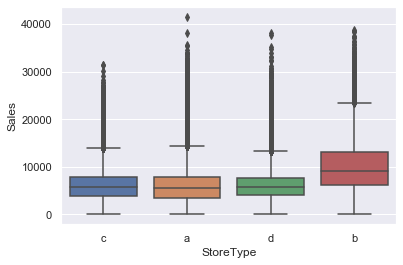

In [14]:
#analysing sales by store and assortment type
sns.boxplot(x=consolidated['StoreType'],y=consolidated['Sales'])

From the above box plot, we can observe that store type 'b' has a significantly higher IQR, median, 25th and 75th percentile than the rest which have almost similar distribution, with store type 'd' having noticeably smaller IQR than the rest.

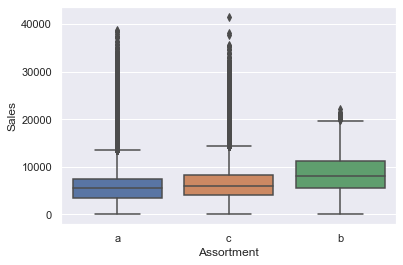

In [15]:
sns.boxplot(x=consolidated['Assortment'],y=consolidated['Sales'])

From the above plot above it can be inferred that stores with assortment type 'b' have significqntly higher IQR, meadian, 25th and 75th percentile sales than the rest. It is also likely that most of the stores with assortment 'b' are of the store type 'b'.

We will now take a look at how sales and no. of customers are related

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


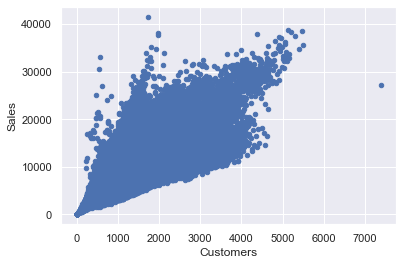

In [17]:
consolidated.plot.scatter(x='Customers',y='Sales')
plt.show()

As expected, sales and no. of customers are strongly linearly related with a few outliers

Let us now look at how competition distance and sales are related

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


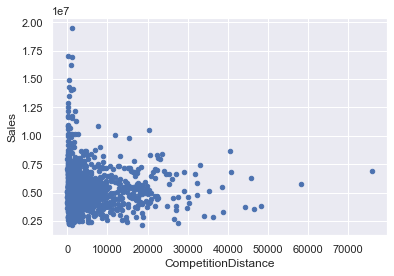

In [22]:
sales_grouped=train.groupby(['Store'])['Sales'].sum()
sales_grouped.columns=['Total Sales']
sales_conso=pd.merge(sales_grouped,store,how='left',on='Store')
sales_conso_final=sales_conso.dropna(subset=['CompetitionDistance'])
sales_conso_final.plot.scatter(x='CompetitionDistance', y='Sales')
plt.show()

As can be observed from the plot above, our initial hypothesis that sales should increase as the competition distance increases is disproved here. The sales does not change much as the distance increases.

We will now have a look at the distribution of sales with respect to promotions


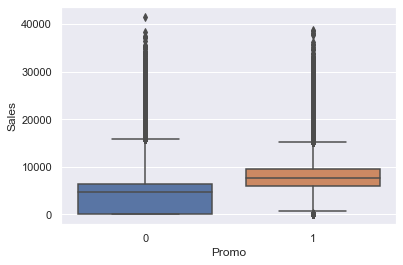

In [23]:
sns.boxplot(x=consolidated['Promo'],y=consolidated['Sales'])
plt.show()

As we can observe, it's quite clear that sales are significantly higher on days when promo is avalaible. This reaffirms our initial hypothesis.